# Chapter 3 testrun

Here, I will run explore setting up DOE run-through in Python based on the DOE simplified book, chapter 3.

In [39]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
import math

In [42]:
# df = pd.read_csv('TypingDOE.xlsx', index_col=0)
df = pd.read_excel('TypingDOE.xlsx', index_col=0)

df['Fingers'] = df['Fingers'].astype('category')
df['Dist'] = df['Dist'].astype('category')
df['Burp'] = df['Burp'].astype('category')
df['Time'] = df['Time'].astype('category')

def get_high_low(x, low_category):
    if x == low_category:
        return '-'
    else:
        return '+'

factor_df = pd.DataFrame(index=df.index)
factor_df['j_wpm'] = df['J_wpm']
factor_df['e_wpm'] = df['E_wpm']
factor_df['j_epm'] = df['J_epm']
factor_df['e_epm'] = df['E_epm']
factor_df['A'] = df['Fingers'].apply(get_high_low, args=(0,))
factor_df['B'] = df['Dist'].apply(get_high_low, args=(0,))
factor_df['C'] = df['Burp'].apply(get_high_low, args=(0,))
factor_df['D'] = df['Time'].apply(get_high_low, args=(0,))

def calculate_interaction(data_df, cols):
    slices = data_df[cols].apply(tuple, axis=1)
    
    interaction = list()
    for tup in slices:
        int_tup = reduce(lambda a,b: '+' if a == b else '-', tup)
        interaction.append(int_tup)
    return interaction

all_cols = list()

for l1 in 'ABCD':
    all_cols.append(l1)
    l1_passed.add(l1)
    for l2 in 'ABCD':
        if l2 > l1:
            factor_df[l1+l2] = calculate_interaction(factor_df, [l1, l2])
            all_cols.append(l1+l2)
            print('l1 {} l2 {}'.format(l1, l2))
        for l3 in 'ABCD':
#             if l2 not in l2_passed:
            if l3 > l2 and l3 > l1 and l2 > l1:
                all_cols.append(l1+l2+l3)
                factor_df[l1+l2+l3] = calculate_interaction(factor_df, [l1, l2, l3])
all_cols.append('ABCD')
factor_df['ABCD'] = calculate_interaction(factor_df, ['A', 'B', 'C', 'D'])
                
            
# factor_df['AB'] = calculate_interaction(factor_df, ['A', 'B'])
# factor_df['AC'] = calculate_interaction(factor_df, ['A', 'C'])
# factor_df['BC'] = calculate_interaction(factor_df, ['B', 'C'])
# factor_df['ABC'] = calculate_interaction(factor_df, ['A', 'B', 'C'])

factor_df = factor_df.iloc[0:-1]

print(factor_df)

l1 A l2 B
l1 A l2 C
l1 A l2 D
l1 B l2 C
l1 B l2 D
l1 C l2 D
      j_wpm  e_wpm  j_epm  e_epm  A  B  C  D AB ABC ABD AC ACD AD BC BCD BD  \
Run                                                                           
7.0   72.47  36.57   11.5   15.5  +  -  -  +  -   +   -  -   -  +  +   +  -   
1.0   62.92  40.77   12.5   21.0  +  +  +  +  +   +   +  +   +  +  +   +  +   
4.0   71.16  44.15    8.0   12.0  +  +  -  -  +   -   -  -   +  -  -   +  -   
13.0  57.69  25.99   11.0    7.5  -  -  +  +  +   +   +  -   -  -  -   -  -   
5.0   70.87  44.18   10.5   12.5  +  -  +  +  -   -   -  +   +  +  -   -  -   
8.0   76.13  44.94   17.0   22.0  +  -  -  -  -   +   +  -   +  -  +   -  +   
11.0  63.80  34.47    7.0    6.5  -  +  -  +  -   +   -  +   +  -  -   -  +   
14.0  60.10  31.59   13.0    8.0  -  -  +  -  +   +   -  -   +  +  -   +  +   
3.0   69.89  44.21   12.5    9.0  +  +  -  +  +   -   +  -   -  +  -   -  +   
15.0  60.89  40.41   15.5   18.0  -  -  -  +  +   -   +  +   +  -  +   

In [33]:
factor_effects = pd.DataFrame(columns=all_cols, index=['j_wpm', 'e_wpm', 'j_epm', 'e_epm'])

def get_factor_effect(factor_col, effect_col, data_df):
    
    combined = zip(data_df[factor_col], data_df[effect_col])
    summed = 0
    for elem in combined:
        level = elem[0]
        value = elem[1]
        if level == '+':
            summed += value
        else:
            summed -= value
    return summed

for factor in factor_effects.columns:
    for effect in factor_effects.index:
        factor_effects.ix[effect, factor] = get_factor_effect(factor, effect, factor_df) / 4

print(factor_effects)

             A      AB     ABC     ABD      AC     ACD      AD       B  \
j_wpm  17.7875 -2.1075 -1.0925 -5.0025  3.0825 -3.1025 -0.1375 -7.9575   
e_wpm  15.9525  0.0875 -7.2025 -0.2325  7.7225  0.5825 -1.7475  2.5125   
j_epm    4.375   4.125   5.875   1.625  -0.875   0.625  -3.125  -0.625   
e_epm    7.875   0.125  -2.375   1.125   0.875   2.875  -4.125  -1.625   

           BC     BCD      BD        C      CD       D    ABCD  
j_wpm -1.4225 -2.3275  4.5375 -12.3375  3.7875 -4.1075 -0.5275  
e_wpm  2.9525 -0.2775  1.8625  -5.1125  0.9775 -5.0025 -6.5225  
j_epm   5.625  -0.875  -2.125    1.375  -2.125   0.625  -9.625  
e_epm  17.375   1.375   2.375    3.125   2.125  -0.375  -1.375  


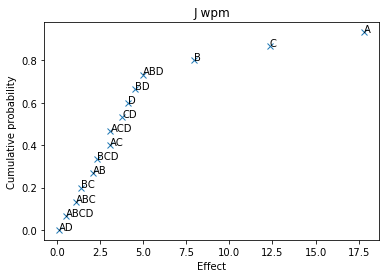

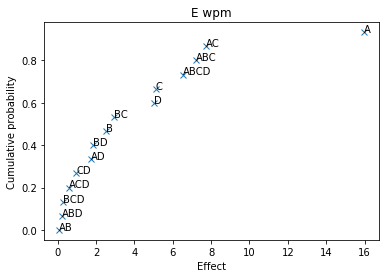

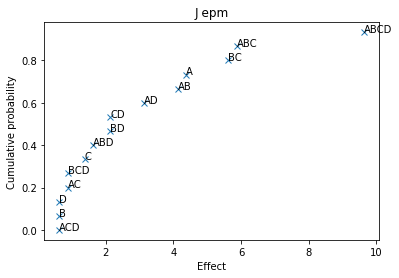

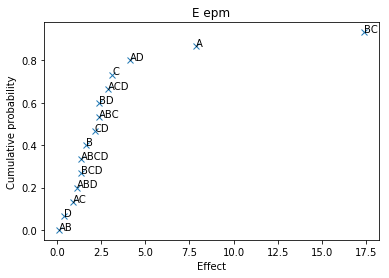

In [34]:
j_wpm_abs_effect = factor_effects.loc['j_wpm'].map(abs).sort_values()
e_wpm_abs_effect = factor_effects.loc['e_wpm'].map(abs).sort_values()
j_epm_abs_effect = factor_effects.loc['j_epm'].map(abs).sort_values()
e_epm_abs_effect = factor_effects.loc['e_epm'].map(abs).sort_values()

def add_labels(plt, effect, prob):
    for i in range(len(effect)):
        plt.annotate(effect.index[i],
                     xy = (effect[i], prob[i]))    

def annotate(plt, title):
    
    plt.xlabel('Effect')
    plt.ylabel('Cumulative probability')
    plt.title(title)
        
tot_c = len(j_wpm_abs_effect)
        
plt.figure()
cum_prob = np.arange(0, 1, 1 / tot_c)
plt.plot(j_wpm_abs_effect, cum_prob, 'x')
add_labels(plt, j_wpm_abs_effect, cum_prob)
annotate(plt, 'J wpm')
plt.show()

plt.figure()
cum_prob = np.arange(0, 1, 1 / tot_c)
plt.plot(e_wpm_abs_effect, cum_prob, 'x')
add_labels(plt, e_wpm_abs_effect, cum_prob)
annotate(plt, 'E wpm')
plt.show()

plt.figure()
cum_prob = np.arange(0, 1, 1 / tot_c)
plt.plot(j_epm_abs_effect, cum_prob, 'x')
add_labels(plt, j_epm_abs_effect, cum_prob)
annotate(plt, 'J epm')
plt.show()

plt.figure()
cum_prob = np.arange(0, 1, 1 / tot_c)
plt.plot(e_epm_abs_effect, cum_prob, 'x')
add_labels(plt, e_epm_abs_effect, cum_prob)
annotate(plt, 'E epm')
plt.show()



# Getting into the statistics

Reference:
* A - Brand
* B - Time
* C - Power
* y1 - Taste
* y2 - Bullets

Steps below initially based on: http://www.marsja.se/three-ways-to-carry-out-2-way-anova-with-python/

In [27]:
print(df)

       Actual run order Fingers Dist Burp Time  J_e  J_epm    J_epmc  J_c  \
Run                                                                         
 7.0                  1       1    0    0    1   23   11.5  0.015840  726   
 1.0                  2       1    1    1    1   25   12.5  0.019841  630   
 4.0                  3       1    1    0    0    8    8.0  0.022472  356   
 13.0                 5       0    0    1    1   22   11.0  0.019031  578   
 5.0                  4       1    0    1    1   21   10.5  0.014810  709   
 8.0                  6       1    0    0    0   17   17.0  0.044619  381   
 11.0                 7       0    1    0    1   14    7.0  0.010972  638   
 14.0                 8       0    0    1    0   13   13.0  0.043189  301   
 3.0                  9       1    1    0    1   25   12.5  0.017883  699   
 15.0                11       0    0    0    1   31   15.5  0.025452  609   
 10.0                10       0    1    1    0    8    8.0  0.030075  266   

In [28]:
print(factor_df)

       j_wpm  e_wpm  j_epm  e_epm  A  B  C  D AB ABC ABD AC ACD AD BC BCD BD  \
Run                                                                            
 7.0   72.47  36.57   11.5   15.5  +  -  -  +  -   +   -  -   -  +  +   +  -   
 1.0   62.92  40.77   12.5   21.0  +  +  +  +  +   +   +  +   +  +  +   +  +   
 4.0   71.16  44.15    8.0   12.0  +  +  -  -  +   -   -  -   +  -  -   +  -   
 13.0  57.69  25.99   11.0    7.5  -  -  +  +  +   +   +  -   -  -  -   -  -   
 5.0   70.87  44.18   10.5   12.5  +  -  +  +  -   -   -  +   +  +  -   -  -   
 8.0   76.13  44.94   17.0   22.0  +  -  -  -  -   +   +  -   +  -  +   -  +   
 11.0  63.80  34.47    7.0    6.5  -  +  -  +  -   +   -  +   +  -  -   -  +   
 14.0  60.10  31.59   13.0    8.0  -  -  +  -  +   +   -  -   +  +  -   +  +   
 3.0   69.89  44.21   12.5    9.0  +  +  -  +  +   -   +  -   -  +  -   -  +   
 15.0  60.89  40.41   15.5   18.0  -  -  -  +  +   -   +  +   +  -  +   +  -   
 10.0  53.14  33.71    8.0   15.0  -  + 

In [29]:
# Let's use some more statistics-related packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats

In [191]:
# Working tooth example

# data = pd.read_csv('ToothGrowth.csv')
# dose_series = data['dose']
# print(dose_series.head())
# print(data.head())
# print(df.head())

# plt.figure()
# fig = interaction_plot(dose_series, data.supp, data.len,
#              colors=['red','blue'], markers=['D','^'], ms=10)
# plt.show()

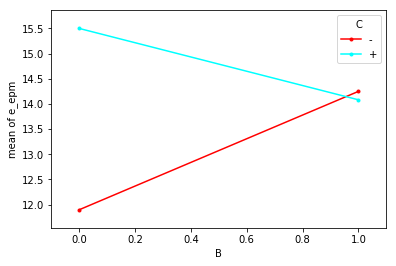

In [38]:
# print('Not satisfied here :\ Different from book, but why?')

# time_series = df['time'].astype('float')
# time_series.index = list(range(0,8))
# fig1 = interaction_plot(time_series, df['power'], df['taste'])
# plt.show()

b_series = factor_df['B'].map(lambda x: 0 if x == '-' else 1).astype('float')
b_series.index = list(range(0,16))
# print(b_series)
fig2 = interaction_plot(b_series, factor_df['C'], factor_df['e_epm'])
plt.show()

# UPCOMING: ANOVAS AND PREDICTION

* List item 
* List 2

sakdjskaldj

In [41]:
my_variable = 2 * 2
print(my_variable)

4
